In [ ]:
!gdown https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc

Downloading...
From: https://drive.google.com/uc?id=1vXjIoRWY0aIpYfhj3TnPUGdmJoHnWaOc
To: /content/model.weights
100% 245M/245M [00:01<00:00, 151MB/s]


#Object Detector

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import easyocr
%matplotlib inline

def TFOD(img):
    yolo = cv2.dnn.readNet("model.weights", "darknet-yolov3.cfg")
    classes = []

    with open("classes.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
            # reader = easyocr.Reader(['en'])
            # result = str(reader.readtext(img))
            # pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
            # result = pytesseract.image_to_string(img, lang='eng', config="--psm 7")
            cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 1)
            cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 1)
    return img

#Images

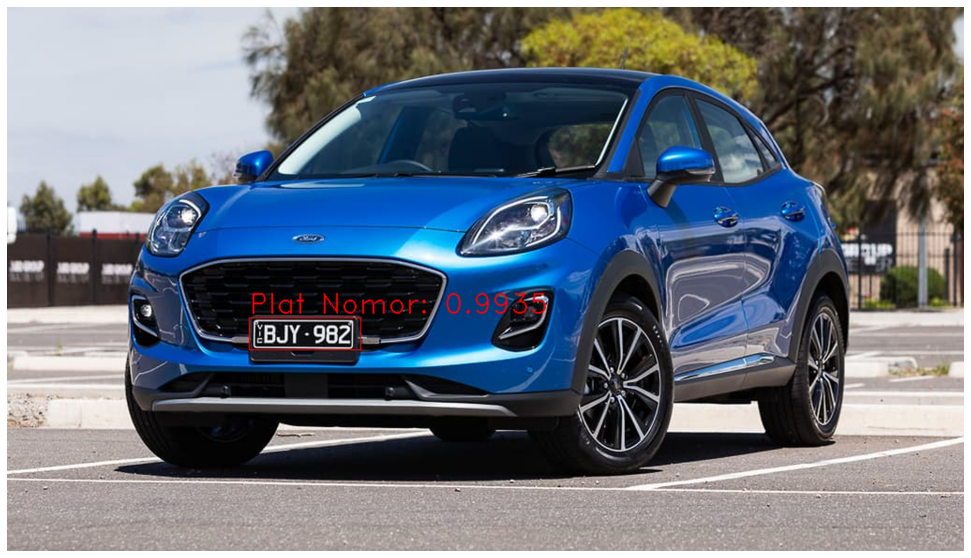

In [22]:
input_image = cv2.imread("image3.jpg")
image = TFOD(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

#Videos

In [ ]:
vid = cv2.VideoCapture("test.mp4")
ret, frame = vid.read()
height,width,layers=frame.shape 

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
video = cv2.VideoWriter('res.avi', fourcc, 20.0, (width, height)) 
frame_counter = 0
while(vid.isOpened()):
    # Capture frame-by-frame
    ret, frame = vid.read()
    output_img = TFOD(frame)
    video.write(output_img)

# # When everything done, release the capture
vid.release()
cv2.destroyAllWindows()
video.release()

KeyboardInterrupt: ignored